<b>背景：利用金融所創造出來的流動性使得人們的物質生活更豐富，在這其中信用評比就成為金融的鑰匙，核發正確的貸款使得金錢的利用更有效率


In [63]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('/Users/Dennis/Downloads/Give-me-some-credit-master/data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


可以看到家屬、收入含有缺失值，可見許多人果然不太想讓別人知道自己的收入水準，家屬則缺少了一點，值得注意的是同樣屬於「調查性資料」的DebtRatio
並沒有缺失值？還蠻可疑的，待會要好好確認一下。有趣的是：沒有公布家庭資訊的一定也不會公布收入水準。

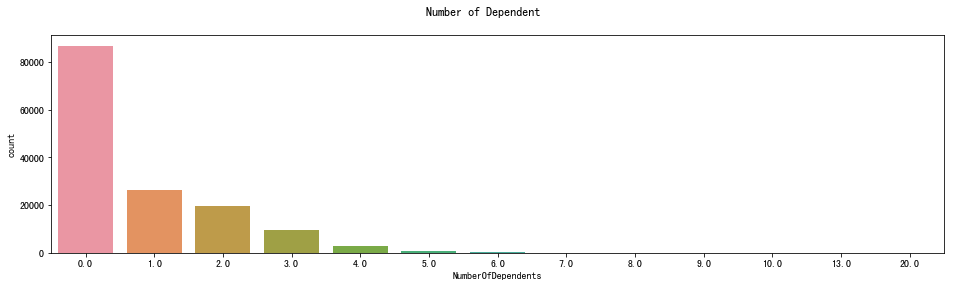

In [66]:
plt.figure(figsize = (16,4))
plt.suptitle('Number of Dependent')
sns.countplot(df.NumberOfDependents)

原始數據中單身的人比較多，所以填補缺失的時候我們可以加重權重。

[nan]


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


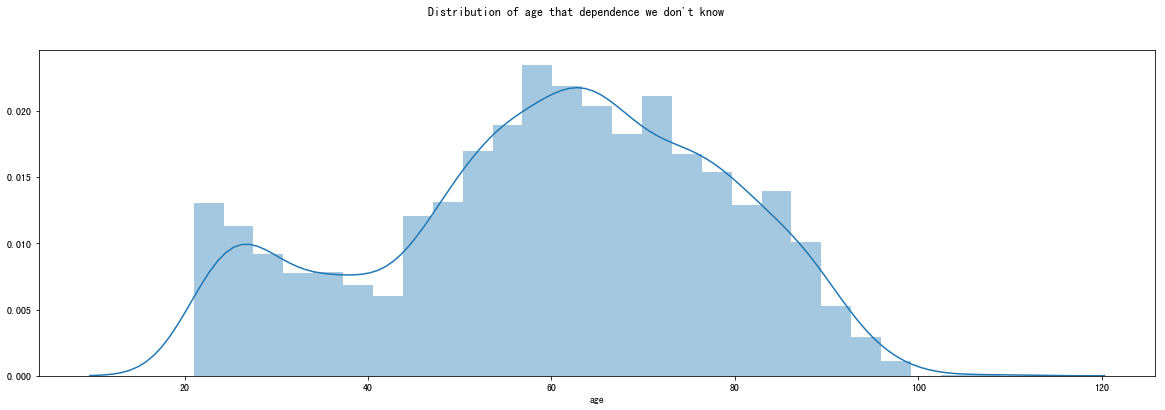

In [67]:
# nan_dep = len(df[df.NumberOfDependents.isna()==True])
# nan_mi = len(df[df.MonthlyIncome.isna()==True])
# print(nan_dep)
# print(nan_mi)
print(df[df.NumberOfDependents.isna()==True]['MonthlyIncome'].unique())
nan_df = df[df.NumberOfDependents.isna()==True]
plt.figure(figsize = (20,6))
plt.suptitle('Distribution of age that dependence we don\'t know ')
sns.distplot(nan_df.age)

這裡我們可以發現，年齡大部分集中在40~80歲，其中有接近百歲，另外一個峰值位於20歲出頭，所以我們來看一下這兩個峰值左右的家庭狀況

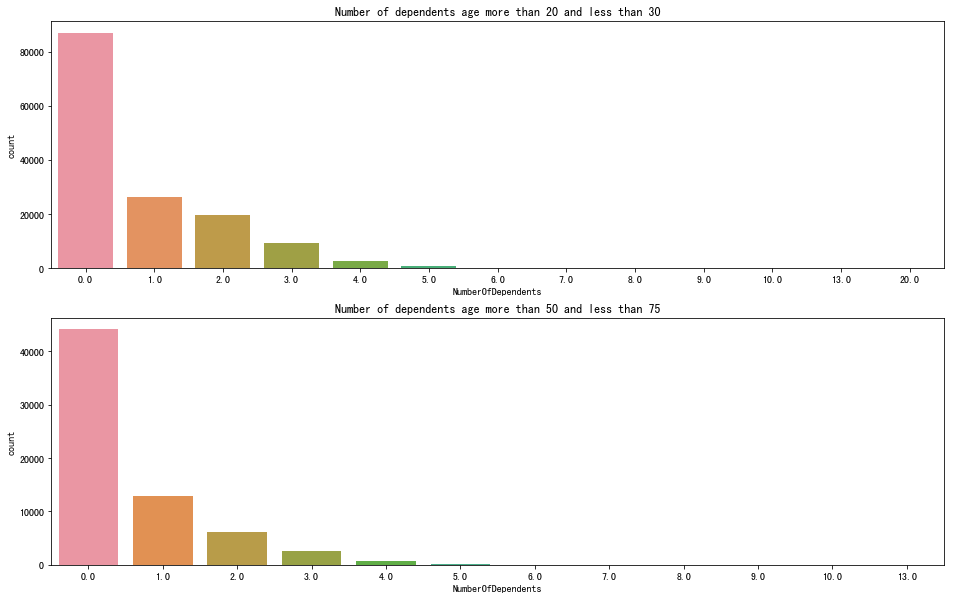

In [68]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (16,10))
sns.countplot(df[(df.age > 20) & df.age <25]['NumberOfDependents'],ax=ax1)
ax1.set_title('Number of dependents age more than 20 and less than 30')
ax2.set_title('Number of dependents age more than 50 and less than 75')
sns.countplot(df[(df.age > 50) & (df.age <75)]['NumberOfDependents'],ax = ax2)

發現果然還是單身族群比較多一點，甚至多非常多，考慮都填上0

In [100]:
df.NumberOfDependents = df.NumberOfDependents.fillna(0)

In [98]:
# from random import sample
# Dependents = pd.Series([0,1,2,3,4])
# for i in data['NumberOfDependents'][data['NumberOfDependents'].isnull()].index:
#     data['NumberOfDependents'][i] = Dependents.sample(1)


# import random

# def list_method(data):
#     all_data = []
#     for v, w in data.items():
#         temp = []
#         for i in range(w):
#             temp.append(v)
#         all_data.extend(temp)
        
#     n = random.randint(0,len(all_data)-1)
#     return all_data[n]

# def fill_imblance_dep(data):
# #     Dependents = {0:89602,1:26316,2:19522,3:9483,4:2862,5:746,6:158}
#     Dependents = dict()
#     ls = [158,746,2862,9483,19522,26316,89602]
#     point = 6
#     for i in ls:
#         Dependents[point] = int((i/148689)*1000)
#         point -= 1
#     for i in data['NumberOfDependents'][data['NumberOfDependents'].isnull()].index:
#         data['NumberOfDependents'][i] = list_method(Dependents)
# fill_imblance_dep(df)
# df.info()

In [102]:
from sklearn.ensemble import RandomForestRegressor

def rf_filling(df):
    process_miss = df.iloc[:,[6,0,1,2,3,4,5,7,8,9]]
    known = process_miss[process_miss.MonthlyIncome.notnull()].as_matrix()
    unknown = process_miss[process_miss.MonthlyIncome.isnull()].as_matrix()
    X = known[:,1:]
    Y = known[:,0]
    
    rf = RandomForestRegressor(random_state = 42,  n_estimators = 20 , max_depth = 3)
    rf.fit(X,Y)
    pred = rf.predict(unknown[:,1:]).round(0)
    
    df.loc[df['MonthlyIncome'].isnull(),'MonthlyIncome'] = pred
    return df
df = rf_filling(df)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


這邊我們將其他feature當作變數去預測MonthlyIncome

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


# 處理異常值

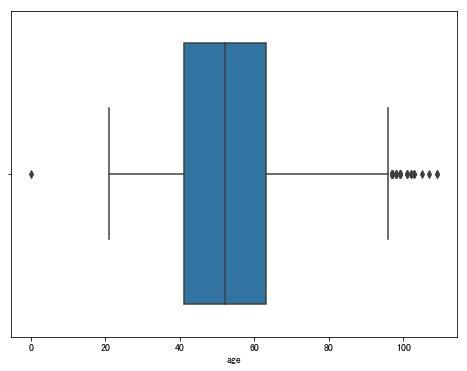

In [105]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot()
sns.boxplot(df.age ,ax=ax)

大於100歲的也太多XD 0歲的明顯不合理。這邊我們使用蓋帽法，把這些數值都縮到標準差。
<div>
另外我們也好奇，這樣的數據長什麼樣子？
<div>
主要是他們的信用卡都開蠻多的，大部分仍是單身？
不過為了建模考量，我們還是要縮減到標準差

In [107]:
df[df.age > 100]
df[df.age ==0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [122]:
df.age.median() - int(2*df.age.std())
df.age.median() + int(2*df.age.std())
df.loc[df.age > 100 ,'age' ] = df.age.median() + int(2*df.age.std())
df.loc[df.age < 20 , 'age'] = df.age.median() - int(2*df.age.std())

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2cbcab38>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2cbcaf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2cbca748>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2cbd1898>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2cbd1be0>,
 'means': []}

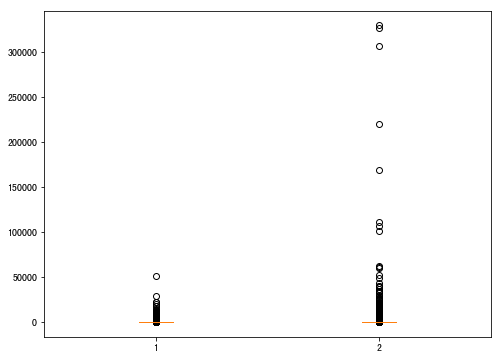

In [128]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
x1 = df.RevolvingUtilizationOfUnsecuredLines
x2 = df.DebtRatio
ax.boxplot([x1 , x2])

In [406]:
for i in range(3,4)

SyntaxError: invalid syntax (<ipython-input-406-9efeda915f5c>, line 1)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


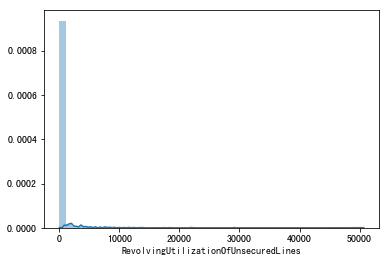

In [131]:
sns.distplot(df[df.RevolvingUtilizationOfUnsecuredLines > 1].RevolvingUtilizationOfUnsecuredLines)

[Text(0, 0, 'NumberOfTime30-59DaysPastDueNotWorse'),
 Text(0, 0, 'NumberOfTimes90DaysLate'),
 Text(0, 0, 'NumberOfTime60-89DaysPastDueNotWorse')]

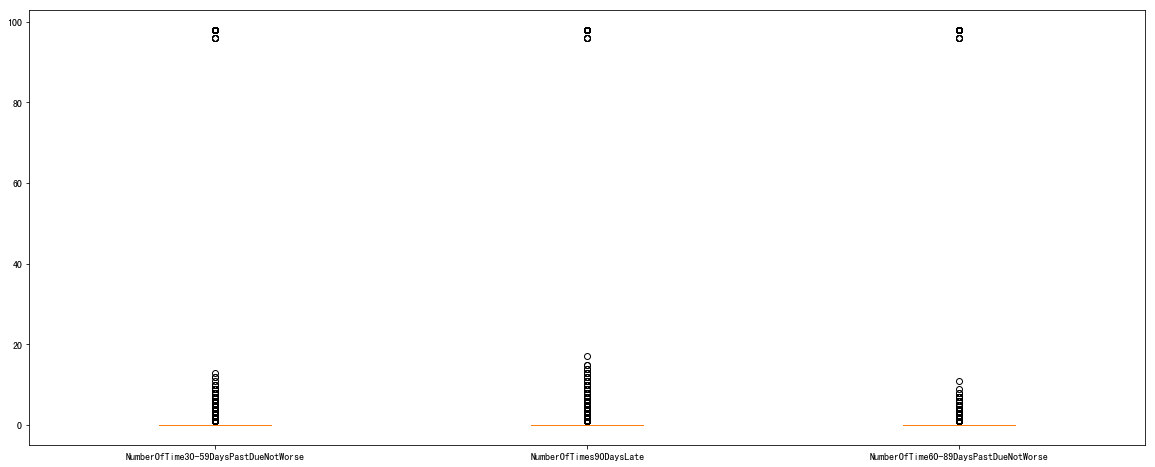

In [139]:
fig = plt.figure(figsize = (20,8))
x1 = df['NumberOfTime30-59DaysPastDueNotWorse']
x2 = df['NumberOfTimes90DaysLate']
x3 = df['NumberOfTime60-89DaysPastDueNotWorse']
ax = fig.add_subplot(111)
ax.boxplot([x1,x2,x3])
ax.set_xticklabels(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'])

共同點就是都有異常值。大概落在90~100，而且似乎重疊了<p>
看一下數據，原來都是98，也就是說我們可以想見數據經過了填補缺失都是98的前處理。<div>
而某些則是用96代替。<div>
<b>可以先問業務單位數據經過什麼樣的處理，為什麼要這樣處理？<div>
所以我們還是Random forest來重新填補這些離群值。<div>

In [144]:
df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 90].head()
df[df['NumberOfTime30-59DaysPastDueNotWorse']==96].head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
41944,41945,1,1.0,26.0,96,0.000000,4819.0,0,96,0,96,0.0
69478,69479,1,1.0,33.0,96,0.008047,4100.0,0,96,0,96,0.0
84167,84168,1,1.0,29.0,96,0.000000,2800.0,0,96,0,96,2.0
94106,94107,1,1.0,34.0,96,0.000000,3500.0,0,96,0,96,1.0
120049,120050,0,1.0,46.0,96,0.051765,4616.0,0,96,0,96,0.0


In [173]:
def rf_transform_NumberOfTime(df ,col_order):
    ls = [0,1,2,3,4,5,6,7,8,9,10,11]
    del ls[col_order]
    s = []
    for i in ls:
        s.append(i)
    s.insert(0,col_order)
    process_miss = df.iloc[:,s]
    known = process_miss[df.iloc[:,col_order]<=90].as_matrix()
    unknown = process_miss[df.iloc[:,col_order]>90].as_matrix()
    X = known[:,1:]
    Y = known[:,0]
    
    rf = RandomForestRegressor(random_state = 42,  n_estimators = 30 , max_depth = 3)
    rf.fit(X,Y)
    pred = rf.predict(unknown[:,1:]).round(0)
    
    df.loc[df.iloc[:,col_order]>90,df.columns[col_order]] = pred
    return df
need_to_transform_order = [4,8,10]
for col in need_to_transform_order:
    df = rf_transform_NumberOfTime(df,col)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values i

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


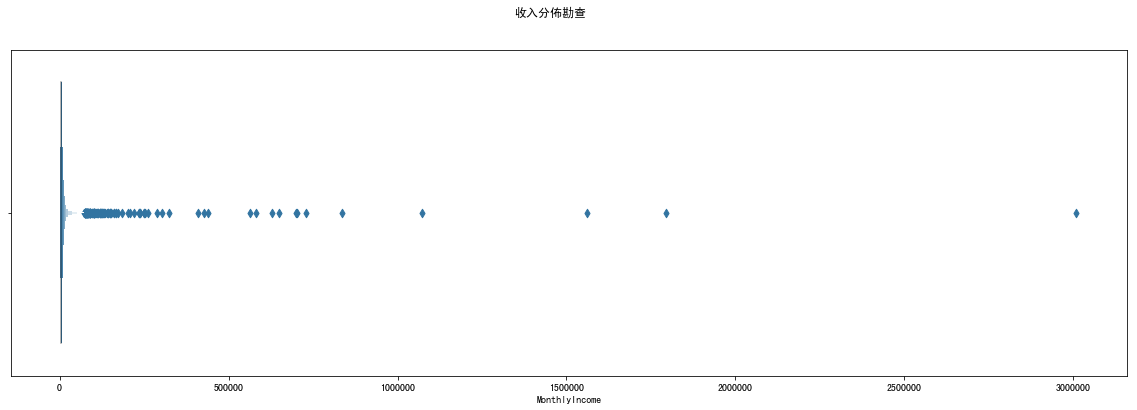

In [178]:
plt.figure(figsize = (20,6))
plt.suptitle('收入分佈勘查')
sns.boxenplot(df.MonthlyIncome)

In [182]:
print(len(df[df.MonthlyIncome>500000]))
df[df.MonthlyIncome>500000]

12


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35973,35974,0,0.439684,64.0,0.0,0.004003,582369.0,11,0.0,0,0.0,1.0
37078,37079,0,0.000000,83.0,0.0,0.000000,629000.0,3,0.0,0,0.0,0.0
50640,50641,0,0.469025,44.0,1.0,0.004537,1072500.0,9,0.0,2,0.0,1.0
73763,73764,0,0.007328,52.0,0.0,0.001470,3008750.0,10,0.0,1,0.0,3.0
93564,93565,0,0.071628,50.0,0.0,0.008268,702500.0,12,0.0,4,0.0,2.0
96549,96550,0,0.064155,52.0,0.0,0.003698,699530.0,11,0.0,2,0.0,1.0
111365,111366,0,0.163856,44.0,0.0,0.004013,1560100.0,12,0.0,4,0.0,2.0
119136,119137,0,0.151329,49.0,0.0,0.001313,649587.0,8,0.0,0,1.0,3.0
122543,122544,0,0.041599,55.0,0.0,0.000147,835040.0,8,0.0,0,0.0,0.0
123291,123292,0,0.226333,67.0,1.0,0.005570,730483.0,23,0.0,1,0.0,0.0


由於有人薪水太高，會對建模產生很大的影響，加上資料數12筆，我們可以用500000替代他們

In [185]:
df.MonthlyIncome[df.MonthlyIncome > 500000] = 500000

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


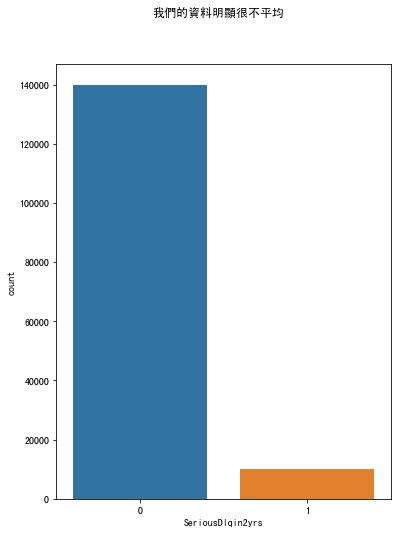

In [190]:
plt.figure(figsize = (6,8))
plt.suptitle('我們的資料明顯很不平均',fontsize = 15)
sns.countplot(df.SeriousDlqin2yrs)

In [202]:
target = df.groupby(df.SeriousDlqin2yrs).SeriousDlqin2yrs.count()
print('不良客戶佔比：' , ((target[1]/ (target[0] + target[1]).round(2)))*100 , '%')

不良客戶佔比： 6.683999999999999 %


這筆資料是相當imbalance的，如果是關心信用卡欺詐，那麼不平衡的數據集就沒有重新採樣的必要，但是這次的題目是：<b>This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.</b>
也就是個人是否經歷過嚴重的拖欠行為，所以我們要泛化到大眾身上

# 特徵工程

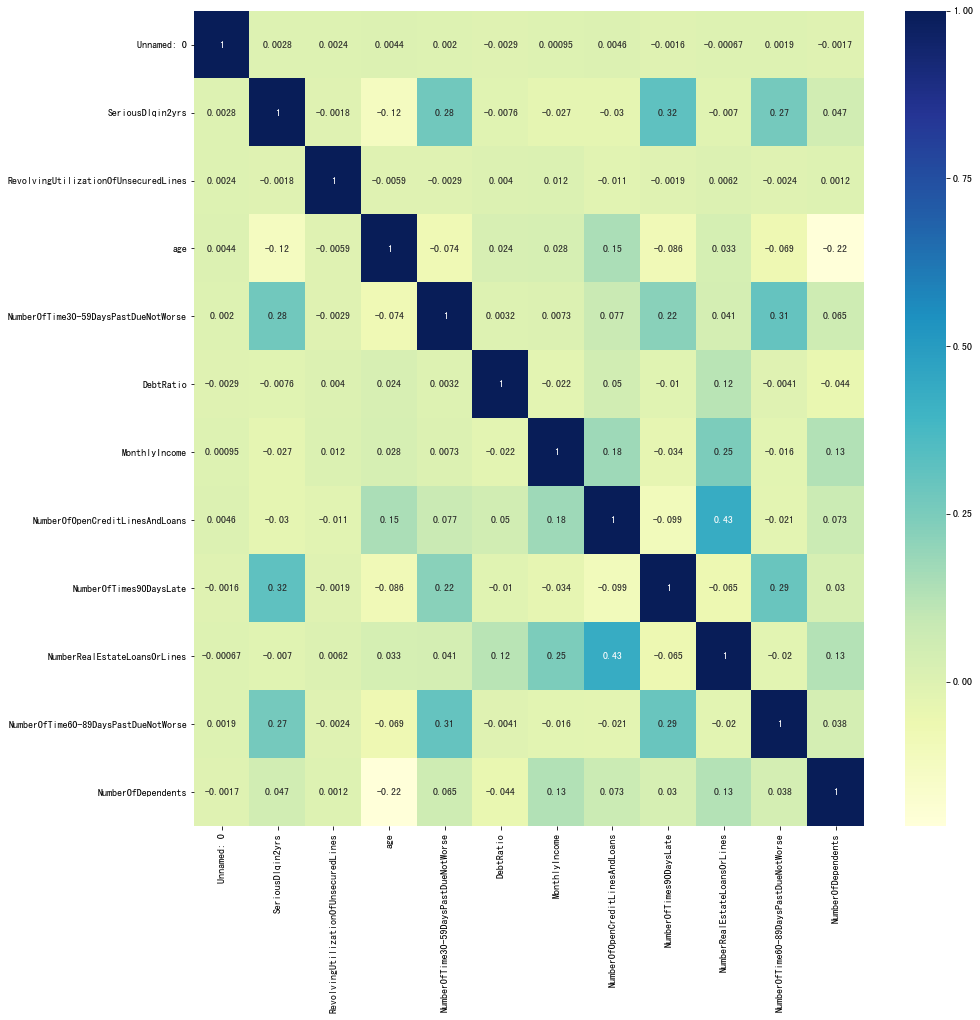

In [204]:
corr = df.corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr ,annot=True , cmap="YlGnBu")

各個變量的相關性都不高，所以初步判斷應該沒有多重共線性的問題

In [364]:
from sklearn.model_selection import train_test_split

Y = df.SeriousDlqin2yrs
X = df.iloc[:,1:]
x_train , x_test , y_train , y_test = train_test_split(X,Y ,train_size = 0.8 , random_state = 42)
train = pd.concat([y_train,x_train],axis = 1)
test = pd.concat([y_test , x_test],axis =  1)
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [209]:
import scipy.stats as stats
def monoto_bin(Y, X, n):
    r = 0
    total_good = Y.sum()
    total_bad =Y.count()-total_good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['goodattr']=d3[Y.name]/total_good
    d3['badattr']=(d3['total']-d3[Y.name])/total_bad
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    print (d4)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe
data = df

In [211]:

dfx1,ivx1,cutx1,woex1 = monoto_bin(data['SeriousDlqin2yrs'],data['RevolvingUtilizationOfUnsecuredLines'],n = 10)
dfx2,ivx2,cutx2,woex2 = monoto_bin(data['SeriousDlqin2yrs'],data['age'],n = 10)
dfx4,ivx4,cutx4,woex4 = monoto_bin(data['SeriousDlqin2yrs'],data['DebtRatio'],n = 10)

   min_RevolvingUtilizationOfUnsecuredLines  \
0                                  0.000000   
1                                  0.029868   
2                                  0.154186   
3                                  0.559053   

   max_RevolvingUtilizationOfUnsecuredLines  SeriousDlqin2yrs  total  \
0                                  0.029866               690  37500   
1                                  0.154176               745  37500   
2                                  0.559044              1888  37500   
3                              50708.000000              6703  37500   

   goodattr   badattr       woe  
0  0.068821  0.262977 -1.340558  
1  0.074307  0.262584 -1.262370  
2  0.188310  0.254419 -0.300890  
3  0.668562  0.220019  1.111413  
   min_age  max_age  SeriousDlqin2yrs  total  goodattr   badattr       woe
0     21.0     33.0              1940  17085  0.193497  0.108199  0.581293
1     34.0     40.0              1694  18012  0.168961  0.116579  0.371099
2     41

In [212]:
def self_bin(Y,X,cat):
    good=Y.sum()
    bad=Y.count()-good
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,cat)})
    d2=d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_index(by='min'))
    print("=" * 60)
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv,woe

In [213]:
pinf = float('inf')
ninf = float('-inf')
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx5 = [ninf,1000,2000,3000,4000,5000,6000,7500,9500,12000,pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]
dfx3, ivx3,woex3 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTime30-59DaysPastDueNotWorse'],cutx3)
dfx5, ivx5,woex5 = self_bin(data['SeriousDlqin2yrs'],data['MonthlyIncome'],cutx5)
dfx6, ivx6,woex6 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfOpenCreditLinesAndLoans'],cutx6) 
dfx7, ivx7,woex7 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTimes90DaysLate'],cutx7)
dfx8, ivx8,woex8 = self_bin(data['SeriousDlqin2yrs'],data['NumberRealEstateLoansOrLines'],cutx8) 
dfx9, ivx9,woex9 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfTime60-89DaysPastDueNotWorse'],cutx9)
dfx10, ivx10,woex10 = self_bin(data['SeriousDlqin2yrs'],data['NumberOfDependents'],cutx10)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()
/Users/Dennis/anaconda3/lib/py

             min   max   sum   total      rate       woe  goodattribute  \
Bucket                                                                    
(-inf, 0.0]  0.0   0.0  5041  126018  0.040002 -0.541721       0.502793   
(0.0, 1.0]   1.0   1.0  2556   16302  0.156791  0.953971       0.254937   
(1.0, 3.0]   2.0   3.0  1837    6352  0.289200  1.737004       0.183224   
(3.0, 5.0]   4.0   5.0   472    1089  0.433425  2.368385       0.047078   
(5.0, inf]   6.0  13.0   120     239  0.502092  2.644643       0.011969   

             badattribute  
Bucket                     
(-inf, 0.0]      0.864282  
(0.0, 1.0]       0.098204  
(1.0, 3.0]       0.032256  
(3.0, 5.0]       0.004408  
(5.0, inf]       0.000850  
                       min       max   sum  total      rate       woe  \
Bucket                                                                  
(-inf, 1000.0]         0.0    1000.0   247   4795  0.051512 -0.276780   
(1000.0, 2000.0]    1001.0    2000.0  1623  18139  0.089476

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()


<em> IV=sum((goodattr-badatt)*ln(goodattr/badattr))=sum((goodattr-badattr)*ln(WOE))
用來確定自變量的預測能力

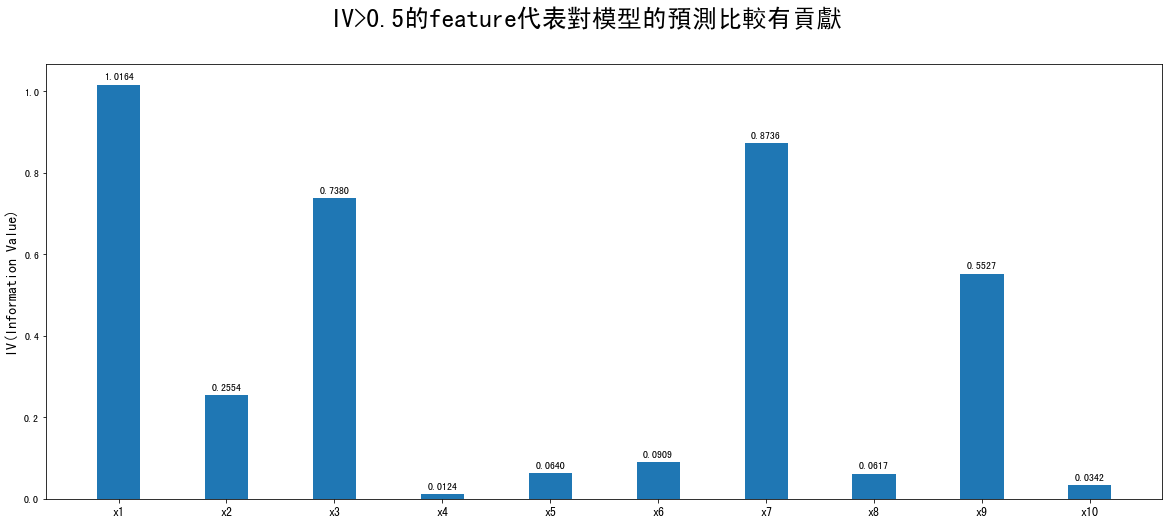

In [217]:
ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10] #各個變量的iv
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
fig1 = plt.figure(1,figsize = (20,8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1 #設置個數
ax1.bar(x, ivlist, width=0.4)#生成柱狀圖
ax1.set_xticks(x) 
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)

for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha = 'center', va = 'bottom', fontsize = 10)
plt.suptitle('IV>0.5的feature代表對模型的預測比較有貢獻', fontsize = 25)
plt.show()

In [351]:
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        try:
            value=series[i]
        except:
            i += 1
            continue
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

# 替換成woe
train['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = pd.Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = pd.Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = pd.Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = pd.Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.dropna(how = 'any')


# 替換成woe
test['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = pd.Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = pd.Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = pd.Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = pd.Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.dropna(how = 'any').head()

,SeriousDlqin2yrs,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,BaseScore,x1,x2,x3,x7,x9,Score
0,0,0,-1.341,0.581,0.954,-0.109,-0.277,1.043,2.726,0.236,2.7,0.101,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
1,0,0,-1.341,0.581,0.954,-0.109,-0.277,1.043,2.726,0.236,2.7,0.101,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
2,0,0,-1.341,0.581,0.954,-0.109,-0.277,1.043,2.726,-0.257,2.7,0.101,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
3,0,0,1.111,0.581,0.954,-0.109,-0.277,1.043,2.726,0.236,2.7,0.101,226.0,21.0,8.0,30.0,145.0,86.0,516.0
4,0,0,1.111,0.581,0.954,-0.109,-0.277,1.043,2.726,0.236,2.7,0.101,226.0,21.0,8.0,30.0,145.0,86.0,516.0


In [219]:
train_X =train.drop(['NumberRealEstateLoansOrLines','NumberOfDependents','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyIncome'],axis=1)
test_X =test.drop(['NumberRealEstateLoansOrLines','NumberOfDependents','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyIncome'],axis=1)

In [352]:
from sklearn.metrics import roc_curve , auc
import statsmodels.api as sm
X_train =train_X.drop(['SeriousDlqin2yrs'],axis =1)
y_train =train_X['SeriousDlqin2yrs']
y_test = test_X['SeriousDlqin2yrs']
X_test = test_X.drop(['SeriousDlqin2yrs'],axis =1)

X_train = sm.add_constant(X_train)
model = sm.Logit(y_train.iloc[:,0], X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.185911
         Iterations 8


接下來為了驗證，我們做統計檢定

In [347]:
print(result.summary2())

                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.246     
Dependent Variable:        SeriousDlqin2yrs        AIC:                     44630.7419
Date:                      2019-04-06 14:51        BIC:                     44688.9134
No. Observations:          120000                  Log-Likelihood:          -22309.   
Df Model:                  5                       LL-Null:                 -29576.   
Df Residuals:              119994                  LLR p-value:             0.0000    
Converged:                 1.0000                  Scale:                   1.0000    
No. Iterations:            8.0000                                                     
--------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------------------------

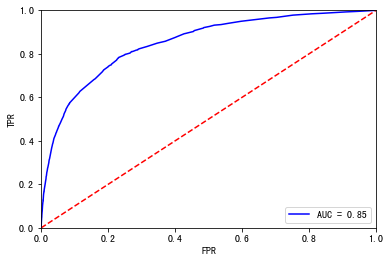

In [356]:
def plot_auc(y_test , prediction):
    FPR,TPR,threshold = roc_curve(y_test,prediction)
    ROC_AUC = auc(FPR,TPR)
    plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])   
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
y_test = y_test.iloc[:,0]
X2 = sm.add_constant(X_test)
prediction = result.predict(X2)
plot_auc(y_test , prediction)

發現AUC是0.85，代表模型的預測效果其實不錯

In [394]:
Y = df.SeriousDlqin2yrs
X = df.iloc[:,1:]
def transform_to_woe(train):
    train['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
    train['age'] = pd.Series(replace_woe(train['age'], cutx2, woex2))
    train['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
    train['DebtRatio'] = pd.Series(replace_woe(train['DebtRatio'], cutx4, woex4))
    train['MonthlyIncome'] = pd.Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
    train['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
    train['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
    train['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
    train['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
    train['NumberOfDependents'] = pd.Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
    train.dropna(how = 'any')
    return train

train = transform_to_woe(X)
train_X =train.drop(['NumberRealEstateLoansOrLines','NumberOfDependents','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyIncome'],axis=1)
X_train =train_X.drop(['SeriousDlqin2yrs'],axis =1)
y_train =train_X['SeriousDlqin2yrs']
X_train = sm.add_constant(X_train)

In [395]:
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.185184
         Iterations 8
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.245     
Dependent Variable:         SeriousDlqin2yrs        AIC:                     55567.3196
Date:                       2019-04-06 15:33        BIC:                     55626.8300
No. Observations:           150000                  Log-Likelihood:          -27778.   
Df Model:                   5                       LL-Null:                 -36808.   
Df Residuals:               149994                  LLR p-value:             0.0000    
Converged:                  1.0000                  Scale:                   1.0000    
No. Iterations:             8.0000                                                     
---------------------------------------------------------------------------------------
                                      Coef.  Std.Err.  

In [399]:
df_test = pd.read_csv('/Users/Dennis/Downloads/Give-me-some-credit-master/data/cs-test.csv')
df_test = df_test.drop('SeriousDlqin2yrs',axis = 1)
test = transform_to_woe(df_test)
test_X =test.drop(['NumberRealEstateLoansOrLines','NumberOfDependents','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyIncome'],axis=1)
X2 = sm.add_constant(test_X.iloc[:,1:])
prediction = result.predict(X2)

In [405]:
submit = pd.read_csv('/Users/Dennis/Downloads/Give-me-some-credit-master/results/give_me_credit-0.csv')
submit['Probability'] = prediction
submit.to_csv('give_me_credit_submit.csv',index = False)

## 建立信用評分卡模型

In [262]:
import math
#這裏設定基本分是600，ＰＤＯ（機率翻倍比值=20）
#好壞比：20

coe = (result.conf_int().iloc[:,0] + result.conf_int().iloc[:,1]) /2
p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)


#計算分數
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

# 各項分數
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x7 = get_score(coe[4], woex7, p)
x9 = get_score(coe[5], woex9, p)

In [263]:
def compute_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
# j和m表示pointer
# list就是在x1里面挑一个值，這個值和series[i]是對應的

from pandas import Series
test['BaseScore']=Series(np.zeros(len(test))) + baseScore
test['x1'] = Series(compute_score(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test['x2'] = Series(compute_score(test['age'], cutx2, x2))
test['x3'] = Series(compute_score(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test['x7'] = Series(compute_score(test['NumberOfTimes90DaysLate'], cutx7, x7))
test['x9'] = Series(compute_score(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test['Score'] = test['x1'] + test['x2'] + test['x3'] + test['x7'] +test['x9']  + baseScore

In [264]:
test.loc[:,['SeriousDlqin2yrs','BaseScore', 'x1', 'x2', 'x3', 'x7', 'x9', 'Score']].head()

,SeriousDlqin2yrs,SeriousDlqin2yrs,BaseScore,x1,x2,x3,x7,x9,Score
0,0,0,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
1,0,0,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
2,0,0,226.0,-25.0,8.0,30.0,145.0,86.0,470.0
3,0,0,226.0,21.0,8.0,30.0,145.0,86.0,516.0
4,0,0,226.0,21.0,8.0,30.0,145.0,86.0,516.0


所以由這張表，我們就可以利用Score知道這個人的信用分數，進而搭配貸款系統配發對應的貸款給他。

額外用sklearn的lr

In [314]:
x_train = X_train.iloc[:,1:].values
y_train = y_train.iloc[:,0].values
x_test = X_test.values
y_test = y_test.iloc[:,0].values

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools


model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)
cnf=confusion_matrix(y_test,model.predict(x_test))
print('混淆矩陣: ')
print(cnf)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


混淆矩陣: 
[[21980  6064]
 [  459  1497]]


Confusion matrix, without normalization
[[21980  6064]
 [  459  1497]]


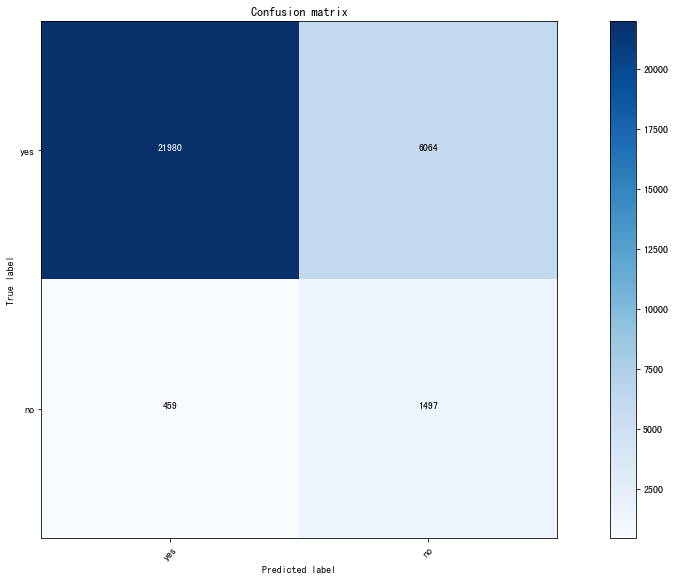

In [320]:

target_name=['yes','no'] #是否有過

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (15,8))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cnf , target_name)

In [321]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     28044
           1       0.20      0.77      0.31      1956

   micro avg       0.78      0.78      0.78     30000
   macro avg       0.59      0.77      0.59     30000
weighted avg       0.93      0.78      0.83     30000



做出來效果普通，不過recall rate有0.77其實還行，畢竟這個模型的重點其實要盡量避開欠款的人
改良方式可以利用人工處理資料不平均而不是簡單在sklearn的model加上weights的參數而已。